# AR

In [18]:
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
import pandas as pd
series = pd.read_csv('daily-minimum-temperatures.csv', index_col = 'Date', squeeze = True, parse_dates=['Date'])
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

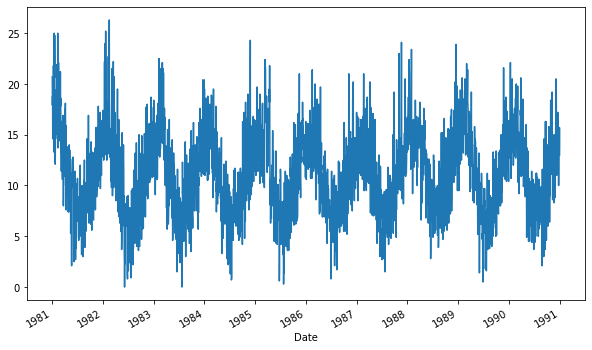

In [31]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

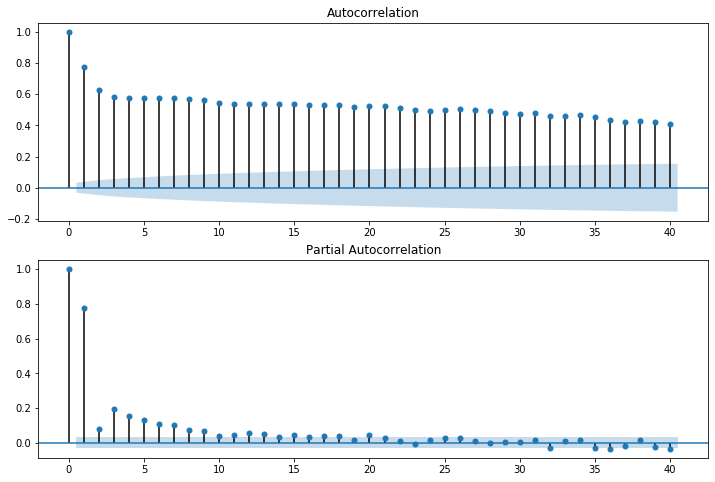

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(series.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(series.values, lags=40, ax=ax2)
plt.show()

# Autoregression Model

In [33]:
from statsmodels.tsa.ar_model import AR

In [34]:
X = series.values
train, test = X[1:len(X)-2000], X[len(X)-2001:]

In [35]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
rng1 =pd.date_range(series.index[5], periods=len(X)-2001, freq='D')
trainS=pd.Series(train, index=rng1)
rng2 =pd.date_range(series.index[len(X)-2001], periods=2001, freq='D')
testS=pd.Series(test,index=rng2)
print(rng1)
print(rng2)

DatetimeIndex(['1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09',
               '1981-01-10', '1981-01-11', '1981-01-12', '1981-01-13',
               '1981-01-14', '1981-01-15',
               ...
               '1985-06-30', '1985-07-01', '1985-07-02', '1985-07-03',
               '1985-07-04', '1985-07-05', '1985-07-06', '1985-07-07',
               '1985-07-08', '1985-07-09'],
              dtype='datetime64[ns]', length=1646, freq='D')
DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-13', '1985-07-14', '1985-07-15', '1985-07-16',
               '1985-07-17', '1985-07-18',
               ...
               '1990-12-21', '1990-12-22', '1990-12-23', '1990-12-24',
               '1990-12-25', '1990-12-26', '1990-12-27', '1990-12-28',
               '1990-12-29', '1990-12-30'],
              dtype='datetime64[ns]', length=2001, freq='D')


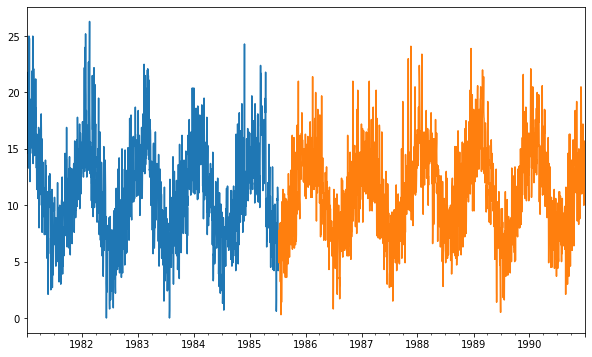

In [41]:
plt.figure(figsize=(10,6));
trainS.loc['1980':].plot()
testS.plot()
plt.show()

In [42]:
print(len(train))
print(len(test))

1646
2001


# Zadanie
Wykonaj predykcję za pomocą modelu AR:
- za pomocą prostej predykcji 
- przeuczając model za każdym razem gdy pojawia się nowy punkt
- nie przeuczając modelu ale używając nowo pojawiających się punktów